This file shows how the (tabular) input factors for the discriminator are set up and important considerations reagarding these.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 88.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# connecting to drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


### Reading in cleaned DF

(not the advanced cleaned one as the further cleaning was only necessary to filter out unfit candidates for the summarization).


### Reading in DF with the arrays of the listings' main images


In [ ]:
## DF with listing data from 07 2022 and added variables - using the adcaced dataset since only for this DF titles were generated

airbnb_london_filtered = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_advanced.csv")

<ipython-input-4-ee0baec5528d>:3: DtypeWarning: Columns (1,3,22,41,45,46,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_london_filtered = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_advanced.csv")


In [ ]:
airbnb_london_filtered.head(n=5)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,name_2023,description_2023,number_of_reviews_2023,review_diff,in_top_third,proxy
0,0.0,13913,https://www.airbnb.com/rooms/13913,20220607181843,2022-06-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730.0,...,1.0,1.0,0.0,0.18,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,41.0,15.0,1.0,3.0
1,1.0,17402,https://www.airbnb.com/rooms/17402,20220607181843,2022-06-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,...,3.0,0.0,0.0,0.36,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,54.0,5.0,1.0,3.0
2,2.0,25123,https://www.airbnb.com/rooms/25123,20220607181843,2022-06-08,Clean big Room in London (Room 1),Big room with double bed clean sheets clean to...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583.0,...,0.0,3.0,0.0,0.87,Clean big Room in London (Room 1),Big room with double bed clean sheets clean to...,129.0,0.0,0.0,1.0
3,3.0,36299,https://www.airbnb.com/rooms/36299,20220607181843,2022-06-07,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,"Residential family neighborhood, with both Eng...",https://a0.muscache.com/pictures/457052/6e819d...,155938.0,...,1.0,0.0,0.0,0.65,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,99.0,7.0,1.0,3.0
4,4.0,39387,https://www.airbnb.com/rooms/39387,20220607181843,2022-06-08,Stylish bedsit in Notting Hill ish flat.,Private lockable bedsit room available within ...,My place is convenient for all London attracti...,https://a0.muscache.com/pictures/beda1dab-9443...,168920.0,...,0.0,1.0,0.0,0.10,Stylish bedsit in Notting Hill ish flat.,Private lockable bedsit room available within ...,10.0,0.0,0.0,1.0


In [ ]:
## reading in Image DF

airbnb_london_images = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/test_img_extra.csv")
airbnb_london_images.head()

,id,img_available
0,13913,1.0
1,17402,1.0
2,25123,1.0
3,36299,1.0
4,39387,1.0


In [ ]:
not_present = airbnb_london_images[airbnb_london_images.img_available == 0.0].shape[0]  #.sum()
print(f'For {np.round(not_present/airbnb_london_images.shape[0]*100,2)} percent of the listings, no picture could be retrieved')

For 5.84 percent of the listings, no picture could be retrieved


Merging the DFs based on id.
Using a left join to keep all listings in the large DF.

In [ ]:
## preparing the merging

airbnb_london_filtered.id = airbnb_london_filtered.id.astype('int')
airbnb_london_images.id = airbnb_london_images.id.astype('int')

In [ ]:
airbnb_london_filtered_images = pd.merge(airbnb_london_filtered, airbnb_london_images, on = 'id', how = 'left' )

assert airbnb_london_filtered_images.shape[0] == airbnb_london_filtered.shape[0]

Now, checking for listings for which no image could be retrieved and dropping
remanning listings.

In [ ]:
## dropping those

airbnb_london_filtered_images = airbnb_london_filtered_images[airbnb_london_filtered_images.img_available == 1.0]

In [ ]:
airbnb_london_filtered_images.index = range(airbnb_london_filtered_images.shape[0])

## Declaring and setting up further Variables to be used in the discriminator

Certain variables like the price or the mean review score can change over time. If hte change from 2022 to 2023 is too large, then the discriminator-based method would nto be robust. Hence, I shall also check for the differences of these across time.

In [ ]:
_2023_data_check = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/2023_london_basic_listings.csv")[["id", "price", "review_scores_rating"]]
_2023_data_check.columns = ["id", "price_2023", "review_scores_rating_2023"]



In [ ]:
airbnb_london_filtered_images_2023_added = pd.merge(airbnb_london_filtered_images,_2023_data_check, how = "left", on = "id" )

Tabular Confounders

### Host related variables


#### 1) Superhost-status

* makes logical sense
* paper also finding this: Koh et al. (2021): How you name your Airbnb’s title matters: comparison of seven countries

In [ ]:
airbnb_london_filtered_images.host_is_superhost.value_counts()


f    26879
t     2960
Name: host_is_superhost, dtype: int64

In [ ]:
## calculating binary variable

#airbnb_london_filtered_images['super_host_status'] = 0
#airbnb_london_filtered_images.super_host_status[airbnb_london_filtered_images.host_is_superhost == 't'] = 1


<ipython-input-21-c8104df8e07f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered_images_2023_added.super_host_status[airbnb_london_filtered_images_2023_added.host_is_superhost == 't'] = 1


#### 2) Veerified Host identity

In [ ]:
airbnb_london_filtered_images.host_identity_verified.value_counts()


t    24078
f     5761
Name: host_identity_verified, dtype: int64

#### Property Type

* makes some sense
* Paper arguing for this: Martinez at al. (2017): The Impact of an AirBnB Host’s Listing Description ‘Sentiment’ and Length on Occupancy Rates

In [ ]:
airbnb_london_filtered_images.room_type.value_counts()

# nice categorical feature

Entire home/apt    16794
Private room       13047
Name: room_type, dtype: int64

### Neighborhood/Location related variables


* makes sense, worse neighborhood/location -> less attractive listing
* Finding that location moderates effect of title on performace: Koh et al. (2021): How you name your Airbnb’s title matters: comparison of seven countries
* Location not found to be relevant, although expected: Falk et al. (2019): The role of specific attributes in determining prices of Airbnb listings in rural and urban locations

#### 1) Centrality of listing


In [ ]:
airbnb_london_filtered_images.neighbourhood_cleansed.value_counts()


Tower Hamlets             2778
Hackney                   2749
Westminster               2686
Southwark                 1998
Camden                    1971
Islington                 1950
Lambeth                   1840
Wandsworth                1599
Kensington and Chelsea    1592
Hammersmith and Fulham    1281
Lewisham                   988
Haringey                   910
Brent                      818
Ealing                     688
Newham                     658
Barnet                     599
Greenwich                  592
Waltham Forest             580
Richmond upon Thames       492
Merton                     473
Hounslow                   397
Croydon                    391
Hillingdon                 220
Bromley                    219
Redbridge                  218
Kingston upon Thames       216
Enfield                    191
City of London             181
Harrow                     160
Barking and Dagenham       122
Sutton                     107
Havering                    89
Bexley  

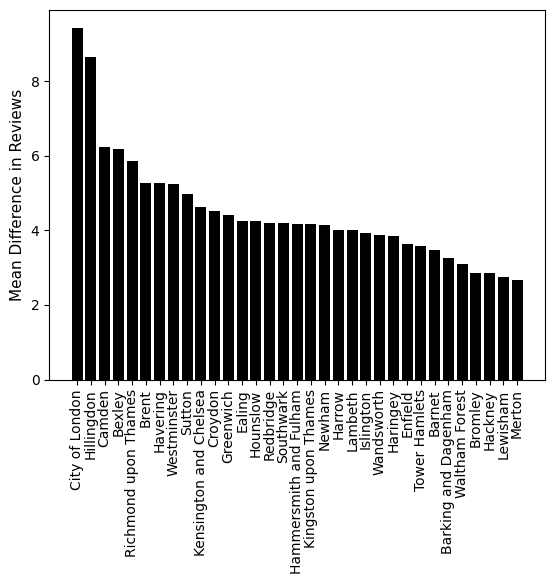

In [ ]:

review_diff_by_quarter =  airbnb_london_filtered_images.groupby("neighbourhood_cleansed")["review_diff"].mean().sort_values(ascending = False)

plt.bar(review_diff_by_quarter.index, list(review_diff_by_quarter ), color = "black" )
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("Mean Difference in Reviews", size = 11)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/review_diff_by_quarter.png')
plt.show()

I shall compute binary varaibles that indicate whether a listing lies within the boundary of outer london or even wihtin the boundary of inner london.
I shall use the inner and outer boundary data as laid out by the Greater London Authority: https://data.london.gov.uk/dataset/inner-and-outer-london-boundaries-london-plan-consultation-2009

Importantly, this data is not in the usual coorindate forat, but in the British OS format,, so a function to map between these is needed.

In [ ]:
import geopandas as gpd

london_geodata = gpd.read_file("/content/gdrive/My Drive/Thesis/London_Data/geospatial_data/lp-consultation-oct-2009-inner-outer-london.shp")   #, SHAPE_RESTORE_SHX  = "YES")
london_geodata.head()



,Boundary,Source,Area_Ha,Shape_Leng,Shape_Area,geometry
0,Inner London,London Plan Consultation Draft,34863.295694,117020.737488,3.486330e+08,"POLYGON ((522055.597 178014.703, 521975.801 17..."
1,Outer London,London Plan Consultation Draft,124606.812118,373367.664448,1.246068e+09,"POLYGON ((503611.197 175520.397, 503613.300 17..."


In [ ]:
import pyproj


def return_os_coordinates(long_os, lat_os):

  """This function computes the OS Coordinates from the normal longituda/latitude coordinates """

  # Define two projections, one for the British National Grid and one for WGS84 (Lat/Lon)
  # You can use the full PROJ4 definition or the EPSG identifier (PROJ4 uses a file that matches the two)

  #bng = Proj("+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +datum=OSGB36 +units=m +no_defs towgs84='446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894'")
  #wgs84 = Proj('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

  bng = pyproj.Proj(init='epsg:27700')
  wgs84 = pyproj.Proj(init='epsg:4326')

  lon,lat = pyproj.transform(wgs84,bng,long_os,lat_os)

  return lon, lat



In [ ]:

from shapely.geometry import Point
airbnb_london_filtered_images.index = range(airbnb_london_filtered_images.shape[0])

list_os_points = []

airbnb_london_filtered_images["in_outer_boundary"] = 0
airbnb_london_filtered_images["in_inner_boundary"] = 0


for i in range(airbnb_london_filtered_images.shape[0]):

  print(i/airbnb_london_filtered_images.shape[0])

  os_coordinate = return_os_coordinates(airbnb_london_filtered_images.longitude[i], airbnb_london_filtered_images.latitude[i])
  os_coordinate_point = Point(os_coordinate)

  # checking for inner boundary - automatically assigniing one for both columns
  if  london_geodata.geometry[0].contains(os_coordinate_point):
    airbnb_london_filtered_images["in_inner_boundary"][i] = 1
    airbnb_london_filtered_images["in_outer_boundary"][i] = 1
#  else checking if the listings lies in the outer area
  elif london_geodata.geometry[1].contains(os_coordinate_point):
    airbnb_london_filtered_images["in_outer_boundary"][i] = 1
  else:
    pass


  list_os_points.append(os_coordinate_point)

airbnb_london_filtered_images["os_coordinates"] = list_os_points

In [ ]:
os_ccoordinates_df = airbnb_london_filtered_images[["id", "os_coordinates", "in_inner_boundary", "in_outer_boundary"]]
os_ccoordinates_df.to_csv("/content/gdrive/My Drive/Thesis/London_Data/co_coordinates_listings.csv", index = False )

In [ ]:
# for the case of reading these data in
#from shapely import wkt

#os_ccoordinates_df = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/co_coordinates_listings.csv")

#airbnb_london_filtered_images["os_coordinates"] = os_ccoordinates_df.os_coordinates
#airbnb_london_filtered_images["in_inner_boundary"] = os_ccoordinates_df.in_inner_boundary
#airbnb_london_filtered_images["in_outer_boundary"] = os_ccoordinates_df.in_outer_boundary

#airbnb_london_filtered_images['os_coordinates'] = airbnb_london_filtered_images['os_coordinates'].apply(wkt.loads)   # for mapping to geo-data


In [ ]:
os_ccoordinates_df.tail()

,id,os_coordinates,in_inner_boundary,in_outer_boundary
32989,635191614806870528,POINT (531982.4008627074 187194.9948198778),1,1
32990,635294055330761344,POINT (530729.4253727653 190431.76968731714),0,1
32991,638855416715743360,POINT (518123.1389271858 179080.24985517515),0,1
32992,638998744536417024,POINT (526538.8544243478 177217.9433733481),1,1
32993,638263301652203648,POINT (524082.2710174932 184929.09895195288),0,1


Examining the nume er of listings outside of the inner/outer boudary:

In [ ]:
airbnb_london_filtered_images["in_outer_boundary"].value_counts()

1    29842
Name: in_outer_boundary, dtype: int64

In [ ]:
## dropping this column :D

airbnb_london_filtered_images = airbnb_london_filtered_images.drop('in_outer_boundary', axis=1)

In [ ]:
airbnb_london_filtered_images["in_inner_boundary"].value_counts()

1    22987
0     6855
Name: in_inner_boundary, dtype: int64

Let's examine the location of the listings:

In [ ]:
geo_airbnb_london_filtered_images = gpd.GeoDataFrame(airbnb_london_filtered_images, geometry = "os_coordinates")

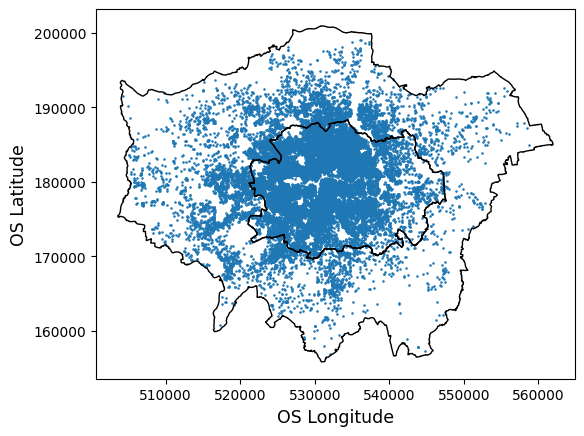

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

base = london_geodata.boundary.plot(linewidth=1, edgecolor="black")
geo_airbnb_london_filtered_images.plot(ax=base, linewidth=1, markersize = 0.7)
plt.xlabel("OS Longitude", size = 12.5)
plt.ylabel("OS Latitude", size = 12.5)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/location_listings.png')
plt.show()

Also visual examination by sucess metric:

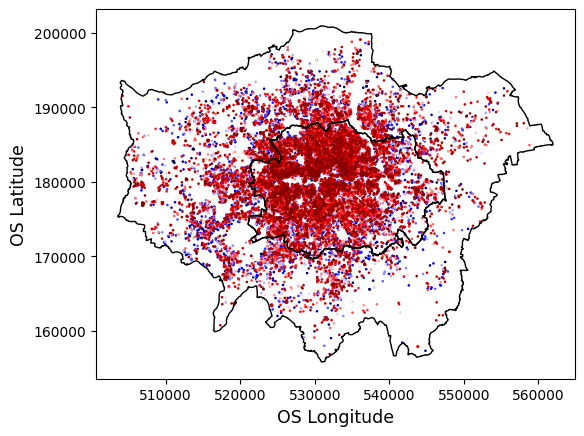

In [ ]:
base = london_geodata.boundary.plot(linewidth=1, edgecolor="black")
geo_airbnb_london_filtered_images.plot(ax=base, linewidth=1, markersize = 0.75, c = geo_airbnb_london_filtered_images.review_diff, cmap='seismic')
# blue = bad, red = good / high diff
plt.xlabel("OS Longitude", size = 12.5)
plt.ylabel("OS Latitude", size = 12.5)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/review_diff.png')
plt.show()

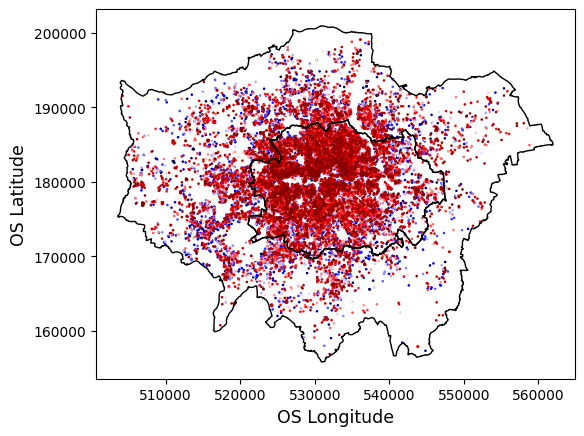

In [ ]:
base = london_geodata.boundary.plot(linewidth=1, edgecolor="black")
geo_airbnb_london_filtered_images.plot(ax=base, linewidth=1, markersize = 0.75, c = geo_airbnb_london_filtered_images.proxy, cmap='seismic')
# blue = cheap, red = expensive
plt.xlabel("OS Longitude", size = 12.5)
plt.ylabel("OS Latitude", size = 12.5)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/review_diff_dichotomous.png')
plt.show()

#### 2) Neighborhood description

This variable is actually a textual one. However, Martinez et al. (2017) found that the length of this can be predicitve of the performance of an airbnb listing. Hence, this shall be encoded in a variable. Later, this varaible migght be adressed in a more sophisticated way.Importantly, this variable is not part of the description.

In [ ]:
### tripping descriptions of html tags

def get_rid_html_tags(description_) -> str:

  """This function removes all html tags like '/><b>', '/>' etc from the descriptions """

  cleaned_des = description_.replace('br ', '')
  cleaned_des = cleaned_des.replace('b>', ' ').replace('/', ' ').replace('<', ' ').replace('>', ' ').lstrip()
  cleaned_des = cleaned_des.replace('        ', ' ').replace('       ', ' ').replace('      ', ' ').replace('     ', ' ').replace('    ', ' ' ).replace('   ', ' ').replace('  ', ' ')

  return cleaned_des


In [ ]:
# getting rid of html tags and non-alphanumeric chars:

airbnb_london_filtered_images.neighborhood_overview = airbnb_london_filtered_images.neighborhood_overview.apply(lambda x: get_rid_html_tags(str(x)) )


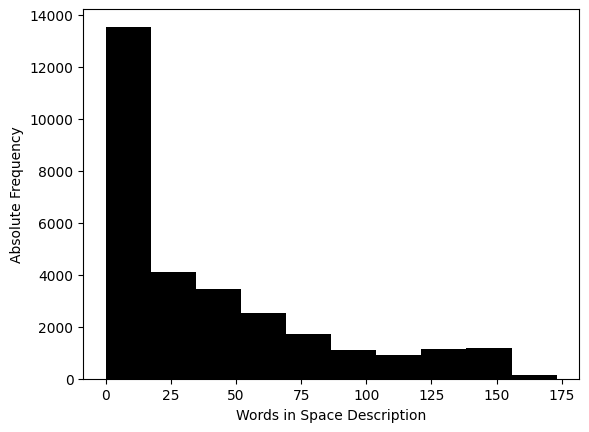

In [ ]:
airbnb_london_filtered_images["neighborhood_overview_len"] = [len([i for i in a.split(' ') if i.isalpha() == True]) for a in airbnb_london_filtered_images.neighborhood_overview]

plt.hist(airbnb_london_filtered_images["neighborhood_overview_len"], color = "black")
plt.xlabel("Words in Space Description")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/length_space_description.png')
plt.show()



#### Price

* makes sense
* Martinez at al. (2017) argue for the imprtacen of price pper occupant, so this variable shall also be computed.

Importantly, the data dictionary verifies that the given values refer to the mean daily prices.

In [ ]:

airbnb_london_filtered_images_2023_added.price = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace('$','') )
airbnb_london_filtered_images_2023_added.price = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace('.00','') )
airbnb_london_filtered_images_2023_added.price = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace(',','') )

airbnb_london_filtered_images_2023_added.price = airbnb_london_filtered_images_2023_added.price.astype('float')

# also using the the main DF exlucinf the 2023 values
airbnb_london_filtered_images["price"] = airbnb_london_filtered_images_2023_added.price

airbnb_london_filtered_images_2023_added.price_2023 = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace('$','') )
airbnb_london_filtered_images_2023_added.price_2023 = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace('.00','') )
airbnb_london_filtered_images_2023_added.price_2023 = airbnb_london_filtered_images_2023_added.price.apply(lambda x: str(x).replace(',','') )

airbnb_london_filtered_images_2023_added.price_2023 = airbnb_london_filtered_images_2023_added.price_2023.astype('float')

airbnb_london_filtered_images_2023_added["price_diff"] = airbnb_london_filtered_images_2023_added["price_2023"] - airbnb_london_filtered_images_2023_added["price"]

In [ ]:
print(airbnb_london_filtered_images_2023_added["price_diff"].max())
print(airbnb_london_filtered_images_2023_added["price_diff"].min())

0.0
0.0


It does seem strange that the differerence in prices is zero.
Perhaps a data collection error occured in the scraping and post-processing mechanism by Inside AirBnB.


In [ ]:
## nochmal gucken, wie man damit umgeht!

In [ ]:
airbnb_london_filtered_images.accommodates.value_counts()



2.0     13620
4.0      5801
1.0      3944
3.0      1984
6.0      1929
5.0      1262
8.0       564
7.0       370
10.0      130
9.0       109
12.0       48
16.0       31
11.0       19
13.0       11
15.0       10
14.0        9
Name: accommodates, dtype: int64

In [ ]:
airbnb_london_filtered_images.price

0          49.0
1         379.0
2          29.0
3         195.0
4          42.0
          ...  
29837      36.0
29838      40.0
29839    1570.0
29840     681.0
29841     200.0
Name: price, Length: 29842, dtype: float64

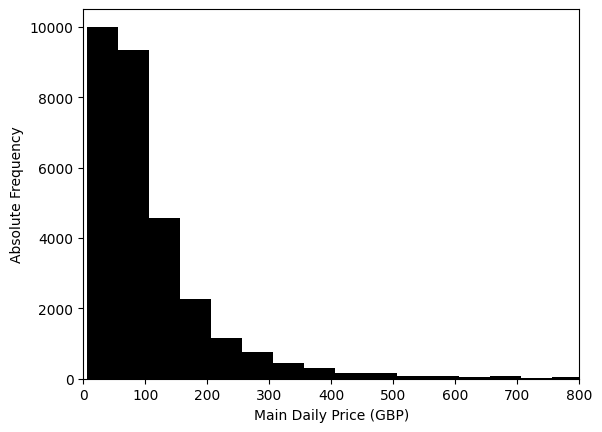

In [ ]:
import matplotlib.pyplot as plt

plt.hist(airbnb_london_filtered_images.price, bins = 200, color = "black")
plt.xlim(0,800)
plt.xlabel("Main Daily Price (GBP)")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/distribution_prices.png')
plt.show()



In [ ]:
# Now setting up price per accomodate

airbnb_london_filtered_images["price_per_accomodate"] = airbnb_london_filtered_images["price"] / airbnb_london_filtered_images["accommodates"]


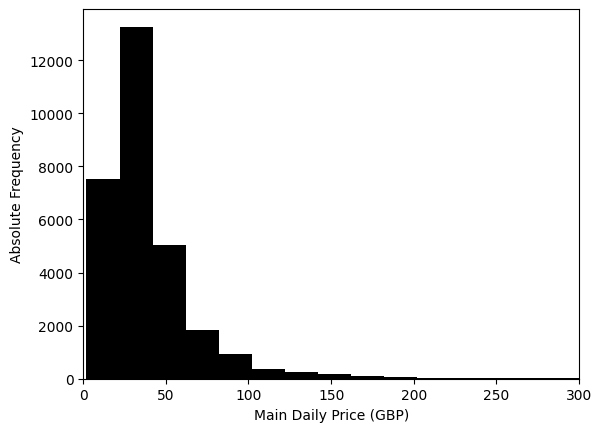

In [ ]:
plt.hist(airbnb_london_filtered_images.price_per_accomodate, bins = 200, color = "black")
plt.xlim(0,300)
plt.xlabel("Main Daily Price (GBP)")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/distribution_prices_per_accomodate.png')
plt.show()

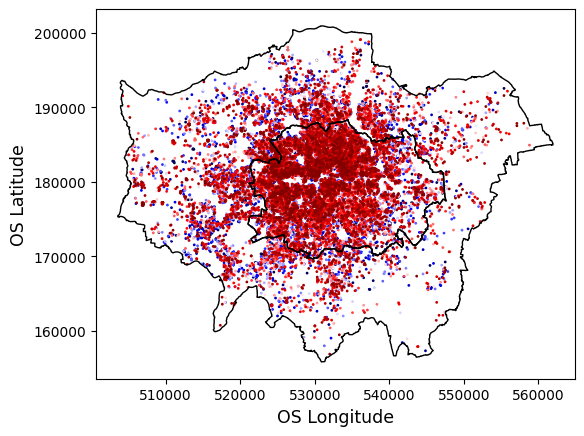

In [ ]:
## plotting again by location and price


geo_airbnb_london_filtered_images = gpd.GeoDataFrame(airbnb_london_filtered_images, geometry = "os_coordinates")

base = london_geodata.boundary.plot(linewidth=1, edgecolor="black")
geo_airbnb_london_filtered_images.plot(ax=base, linewidth=1, markersize = 1, c = geo_airbnb_london_filtered_images.price, cmap='seismic')
# blue = cheap, red = expensive
plt.xlabel("OS Longitude", size = 12.5)
plt.ylabel("OS Latitude", size = 12.5)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/location_listings_price.png')
plt.show()

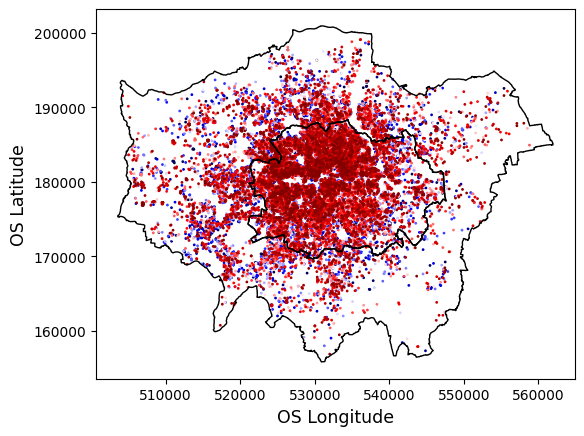

In [ ]:
base = london_geodata.boundary.plot(linewidth=1, edgecolor="black")
geo_airbnb_london_filtered_images.plot(ax=base, linewidth=1, markersize = 1, c = geo_airbnb_london_filtered_images.price_per_accomodate, cmap='seismic')
# blue = cheap, red = expensive
plt.xlabel("OS Longitude", size = 12.5)
plt.ylabel("OS Latitude", size = 12.5)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/location_listings_price_accomodate.png')
plt.show()

#### Review scores

* Makes sense
* Generally importance because of importance of EWOM in digital businesses
* Paper arguing for this a.o.: Koh et al. (2021)


Like with price, first checking for differences from July 22 to March 23.

In [ ]:
airbnb_london_filtered_images_2023_added["review_diff_scores"] = airbnb_london_filtered_images_2023_added["review_scores_rating_2023"] - airbnb_london_filtered_images_2023_added["review_scores_rating"]


In [ ]:
print(min(airbnb_london_filtered_images_2023_added.review_diff_scores))
print(max(airbnb_london_filtered_images_2023_added.review_diff_scores))


-2.0
5.0


These difference are quite large, so filtering out datapoits with a too high difference is required.

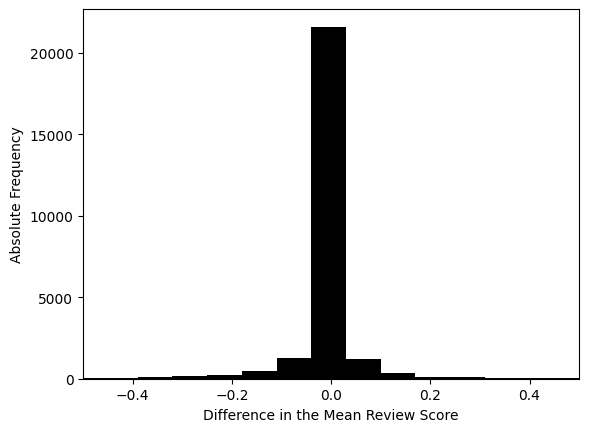

In [ ]:
plt.hist(airbnb_london_filtered_images_2023_added["review_diff_scores"], bins = 100, color = "black")
plt.xlim(-0.5,0.5)
plt.xlabel("Difference in the Mean Review Score")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/distribution_diff_review_scores.png')
plt.show()

In [2]:
to_be_removed = 1 - len([i for i in airbnb_london_filtered_images_2023_added.review_diff if np.abs(i) <= 0.3]) / len(airbnb_london_filtered_images_2023_added["review_diff_scores"])
print(f'{np.round(to_be_removed, 2)*100}% of the listings have an absolute difference in the mean review scrore from 07 22 to 03 23 of more that 0.3.')



13.0% of the listings have an absolute difference in the mean review scrore from 07 22 to 03 23 of more that 0.3.


In [ ]:
# dropping those listings

index_of_listings_keep = [i for i,j in enumerate(airbnb_london_filtered_images_2023_added.review_diff) if np.abs(j) <= 0.3]

airbnb_london_filtered_images = airbnb_london_filtered_images[airbnb_london_filtered_images.index.isin(index_of_listings_keep)]


In [ ]:
airbnb_london_filtered_images.index = range(airbnb_london_filtered_images.shape[0])

#### Number of bathrooms, bedrooms and beds

* makes sense
* Martinez at al (2017) argue in favour of it.

In [ ]:
airbnb_london_filtered_images.bathrooms    ## sadly only nans ##.value_counts

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
25428   NaN
25429   NaN
25430   NaN
25431   NaN
25432   NaN
Name: bathrooms, Length: 25433, dtype: float64

In [ ]:
airbnb_london_filtered_images.bedrooms.value_counts()

1.0     19654
2.0      5941
3.0      1904
4.0       776
5.0       214
6.0        43
7.0        14
10.0        4
8.0         4
22.0        1
16.0        1
12.0        1
Name: bedrooms, dtype: int64

In [ ]:
airbnb_london_filtered_images.beds.value_counts()

1.0     17503
2.0      6998
3.0      2691
4.0      1265
5.0       510
6.0       213
7.0        78
8.0        48
9.0        23
10.0       13
11.0        8
12.0        3
16.0        2
15.0        2
19.0        1
14.0        1
18.0        1
13.0        1
24.0        1
Name: beds, dtype: int64

#### Number of amenities

As there is a fixed set of amenties, I shal check how many there are:

In [ ]:
## Amenities describes a set of variables - checking how many there are

import ast

all_unique_amenities = []

for amenity in airbnb_london_filtered_images.amenities:
  list_current = ast.literal_eval(amenity)

  for a in list_current:
    if a not in all_unique_amenities:
      all_unique_amenities.append(a)

In [ ]:
len(all_unique_amenities)


2064

With 2406 different ones, it does not make sense to create binary variables that indicate whether a certain amenity is present or not. However, it might make sense to create such varaibles for the most common ones.

In [ ]:
import ast

all_amenities = []

for amenity in airbnb_london_filtered_images.amenities:
  list_current = ast.literal_eval(amenity)

  for a in list_current:
      all_amenities.append(a)



Construvting such binary variables for the top 30 most common amenities.

In [ ]:
top_amenities_df = pd.DataFrame(pd.Series(all_amenities).value_counts()).iloc[:31,]


In [ ]:

for a in range(31):
  airbnb_london_filtered_images[f"has_amenity_{top_amenities_df.index[a]}"] = 0

In [ ]:
for i,j in enumerate(airbnb_london_filtered_images.amenities):

  for a in range(31):
    if top_amenities_df.index[a] in ast.literal_eval(j):
      airbnb_london_filtered_images[f"has_amenity_{top_amenities_df.index[a]}"][i] = 1


<ipython-input-206-1ab134e5087b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered_images[f"has_amenity_{top_amenities_df.index[a]}"][i] = 1


In [ ]:
# as an example:
airbnb_london_filtered_images.has_amenity_Wifi.value_counts()

1    24340
0     1093
Name: has_amenity_Wifi, dtype: int64

In [ ]:
# I shall also compute the number of amenities

airbnb_london_filtered_images["len_amenities"] = airbnb_london_filtered_images.amenities.apply(lambda x: len(ast.literal_eval(x) ) )

In [ ]:

airbnb_london_filtered_images["len_amenities"]

0        41
1        23
2        38
3        14
4        34
         ..
25428    13
25429    16
25430    33
25431    27
25432    19
Name: len_amenities, Length: 25433, dtype: int64

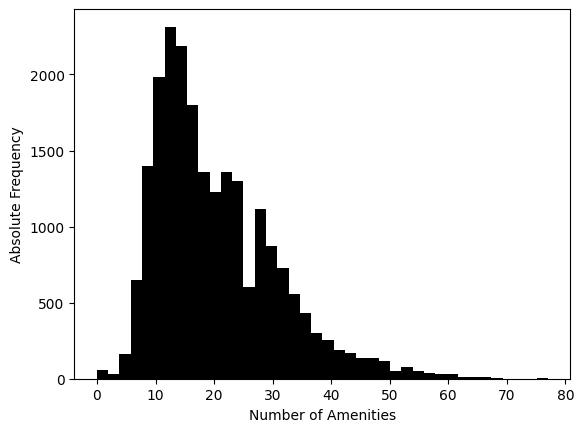

In [ ]:
plt.hist(airbnb_london_filtered_images["len_amenities"], bins = 40, color = "black")
plt.xlabel("Number of Amenities")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/distribution_number_amenities.png')
plt.show()

#### Number of Reviews as of July 2022

* imprtance because of importance of EWOM in digital markets

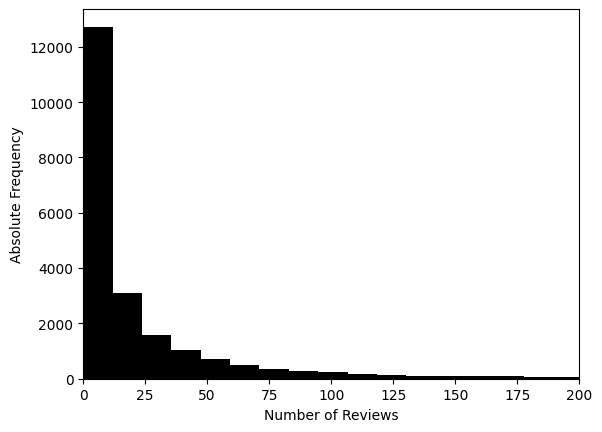

In [ ]:
plt.hist(airbnb_london_filtered_images.number_of_reviews, bins = 80, color = "black")
plt.xlim(0,200)
plt.xlabel("Number of Reviews")
plt.ylabel("Absolute Frequency")
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/distribution_number_reviews.png')
plt.show()



#### Length of the Description

* Martinez at al (2017) find that the length of the description has an impact the the performance. The description itself will be processed in a more sophisitcated way - stil length variable is computed here.

In [ ]:

airbnb_london_filtered_images["len_description"] = [len([i for i in a.split(' ') if i.isalpha() == True]) for a in airbnb_london_filtered_images.description]


#### Saving this DF

In [ ]:
airbnb_london_filtered_images.head()


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,has_amenity_Fire extinguisher,has_amenity_Coffee maker,has_amenity_Dishwasher,has_amenity_Private entrance,has_amenity_Extra pillows and blankets,has_amenity_Elevator,has_amenity_Host greets you,has_amenity_Free parking on premises,len_amenities,len_description
0,0.0,13913,https://www.airbnb.com/rooms/13913,2.022061e+13,2022-06-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730.0,...,1,1,0,0,1,0,0,1,41,154
1,1.0,15400,https://www.airbnb.com/rooms/15400,2.022061e+13,2022-06-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens a...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,...,1,1,0,0,0,0,0,0,23,141
2,3.0,17402,https://www.airbnb.com/rooms/17402,2.022061e+13,2022-06-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,...,0,1,1,0,0,1,0,0,38,112
3,4.0,25123,https://www.airbnb.com/rooms/25123,2.022061e+13,2022-06-08,Clean big Room in London (Room 1),Big room with double bed clean sheets clean to...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583.0,...,0,1,0,0,0,0,0,0,14,129
4,5.0,36299,https://www.airbnb.com/rooms/36299,2.022061e+13,2022-06-07,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,"Residential family neighborhood, with both Eng...",https://a0.muscache.com/pictures/457052/6e819d...,155938.0,...,1,1,1,1,1,0,0,0,34,128


In [ ]:
airbnb_london_filtered_images.tail()


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,has_amenity_Fire extinguisher,has_amenity_Coffee maker,has_amenity_Dishwasher,has_amenity_Private entrance,has_amenity_Extra pillows and blankets,has_amenity_Elevator,has_amenity_Host greets you,has_amenity_Free parking on premises,len_amenities,len_description
25428,45803.0,580353098454214912,https://www.airbnb.com/rooms/580353098454214912,2.022061e+13,2022-06-07,Cheerful one bedroom with own bathroom and patio,Forget your worries in this spacious and seren...,nan,https://a0.muscache.com/pictures/miso/Hosting-...,428957354.0,...,1,0,0,0,0,0,0,1,13,34
25429,46590.0,605174328641310464,https://www.airbnb.com/rooms/605174328641310464,2.022061e+13,2022-06-08,Stylish Double Room in Modern Luxury House,This stylish double room is in an enlarged new...,nan,https://a0.muscache.com/pictures/miso/Hosting-...,134217059.0,...,0,0,0,0,0,0,0,1,16,69
25430,46917.0,609995554031206016,https://www.airbnb.com/rooms/609995554031206016,2.022061e+13,2022-06-08,Cosy Studio Apartment in Notting Hill,Less than 10 minutes away from the Westbourne ...,The property is located in a lovely and vibran...,https://a0.muscache.com/pictures/miso/Hosting-...,258709744.0,...,1,0,0,0,0,0,0,0,33,108
25431,48071.0,635191614806870528,https://www.airbnb.com/rooms/635191614806870528,2.022061e+13,2022-06-08,"Finsbury Park, doorstep to tube Dbl, opp huge ...",Right opposite beautiful Finsbury park..... St...,nan,https://a0.muscache.com/pictures/miso/Hosting-...,7994451.0,...,0,1,1,0,1,0,0,0,27,32
25432,48318.0,638855416715743360,https://www.airbnb.com/rooms/638855416715743360,2.022061e+13,2022-06-08,♡♟❦Private Studio Near Gunnersbury Park ❦♟♡,The accommodation is situated ideally in West ...,The famous St. Paul's Cathedral is close by. O...,https://a0.muscache.com/pictures/prohost-api/H...,129230780.0,...,0,0,0,1,0,0,0,0,19,124


In [ ]:
## dropping some columns

airbnb_london_images = airbnb_london_images.drop(["review_diff_y", 	"proxy_y", 	"in_top_third_y", "description_2023", "name_2023", "proxy_y", "in_top_third_y"], axis = 1)


In [ ]:
airbnb_london_images.to_csv("/content/gdrive/My Drive/Thesis/London_Data/discriminator_tabular_data_images.csv", index = False )